In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

a,b,w = sp.symbols('a,b,w')
# Define other symbolic variables
a1,b1,pin,pout,wa,wb,v,k,d,s21,H = sp.symbols('a_1,b_1,p_{in},p_{out},w_a,w_b,v,k,d,s_{21},H')
#a1=alpha b1=beta v=gamma a=annihilation op for photon and b= annihilattion op for magnon

# Define imaginary unit
j = sp.I

# Define equations
eq1 = sp.Eq(((w-wa+a1*j)*a)*j - (sp.sqrt(v)*pin)*j - v*a - sp.sqrt(k*v)*b - (d*b)*j, 0)
eq2 = sp.Eq(((w-wb+b1*j)*b)*j - (sp.sqrt(k)*pin)*j - k*b - sp.sqrt(k*v)*a - (d*a)*j, 0)

eq3 = sp.Eq(((w-wa+a1*j)*a)*j - (sp.sqrt(v)*pout)*j + v*a + sp.sqrt(k*v)*b - (d*b)*j, 0)
eq4 = sp.Eq(((w-wb+b1*j)*b)*j - (sp.sqrt(k)*pout)*j + k*b + sp.sqrt(k*v)*a - (d*a)*j, 0)
eq5 = sp.Eq(s21,(pout/pin)-1)
# Print equations
#print("Equations:", eq1, eq2)


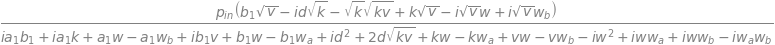

In [2]:
# Solve equations
sol1 = sp.solve(eq1, b)
#solution = sp.solve([eq1, eq3], (pout))
solution1 = sp.solve( eq2.subs(b, sol1[0]), a)
solution1[0]

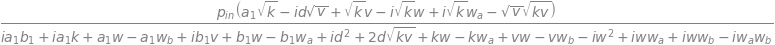

In [3]:
# Solve equations
sol2 = sp.solve(eq1, a)
solution2 = sp.solve( eq2.subs(a, sol2[0]), b)
solution2[0]

In [4]:
# Compute the difference between eq1 and eq3
difference_eq1_eq3 = eq1.lhs - eq3.lhs

# Define the new equation
new_eq = sp.Eq(difference_eq1_eq3, 0)
new_eq
# Print the new equation
#print("Difference between eq1 and eq3:", new_eq)


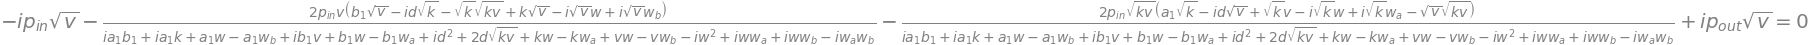

In [5]:
# Substitute the values of a and b into new_eq
new_eq_substituted = new_eq.subs({a: solution1[0], b: solution2[0]})

# Print the new equation with substituted values
new_eq_substituted


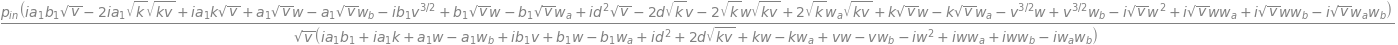

In [6]:
solution3 = sp.solve(new_eq_substituted, pout)
solution3[0]

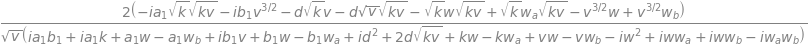

In [7]:
# Solve equation eq5 for s21 after substituting pout from solution3
solution4 = sp.solve(eq5.subs(pout, solution3[0]), s21)

# Assign the value of s21 to a variable
S = solution4[0]
S

# Print the value of s21
#print(S)


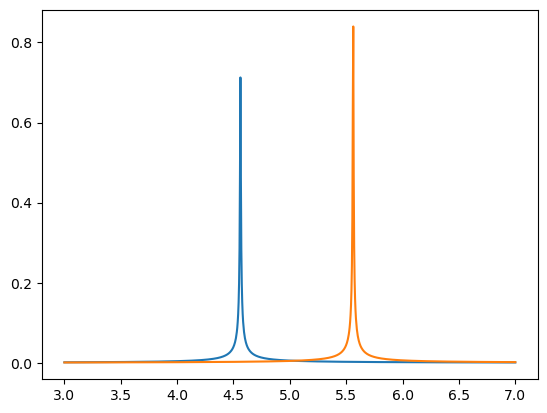

In [8]:
wn=np.linspace(3,7,1000)
Sfunc = sp.lambdify([w,wb],S.subs({v:0.0004,k:0.001,wa:3,b1:0.001,a1:0.003,d:2}) )
for wm_n in [2,4]:
        plt.plot(wn,np.abs(Sfunc(wn,wm_n)))

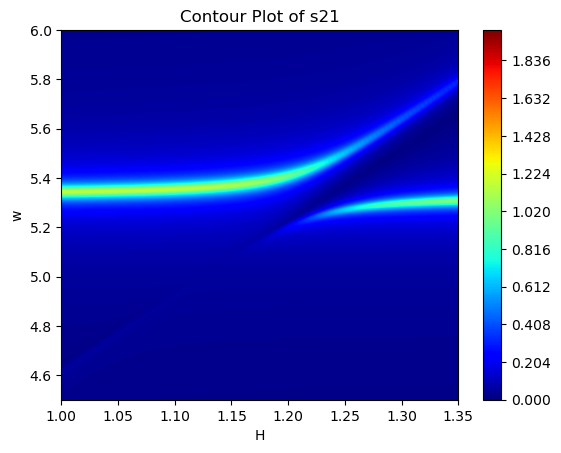

In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

d_value=0.1    # coupling strength between photon (cavity) and magnon mode d=j+if'  where f'= f+sqrt(vk)
k_value=0.001   # extrinsic damping of magnon mode
v_value=0.009  #gamma extrinsic damping of cavity
wa_value=5.33     # cavity resonance frequency 
b1_value=0.014 # intrinsic damping of magnon mode

a1_value=0.0046*(1+(d_value**2)/(b1_value*0.046*5.33*5.33))  # intrinsic damping of cavity 

s21_1=S.subs({v:v_value,wa:wa_value,a1:a1_value,b1:b1_value,k:k_value,d:d_value})


# Define parameter ranges
H_values = np.linspace(1.000, 1.350, 101)
w_values = np.linspace(4.5, 6, 1001)

# Convert symbolic expression s21 to a NumPy function
s21_func = sp.lambdify((w, wb), sp.Abs(s21_1), modules='numpy')

# Initialize a list to store s21_f
s21_f = []

# Loop over each H value
for H in H_values:
    # Calculate wb_value for the current H value
    #wb_value = 2.8*np.sqrt(H * (H + 0.172))
    wb_value=1.38284384+(3.24789744)*H
    
    # Initialize a list to store s21_3 values for the current H value
    s21_f_H = []
    
    for w_val in w_values:
        s21_2 = s21_func(w_val, wb_value)
        s21_f_H.append(s21_2)
      
    # Append s21_f_H to s21_f as a row
    s21_f.append(s21_f_H)

# Convert s21_f to a numpy array and transpose it
s21_f = np.array(s21_f).T  # Transpose s21_f here
H_f = np.array(H_values)
w_f = np.array(w_values)

# Create a contour plot
#contour = plt.contourf(H_f, w_f, s21_f, )
contour = plt.contourf(H_f, w_f, s21_f, cmap='jet', levels=np.linspace(0, 2, 501))
plt.colorbar(contour)
plt.xlabel('H')
plt.ylabel('w')
plt.title('Contour Plot of s21')
plt.show()

#print(s21_f)
#print(H_f)
#print(w_f)
#s21_f.shape[0]
#H_f.shape[0]
#plt.ylim([3.6, 4.4])
#plt.xlim([1250, 1450])
# plt.clim(-7, 0)



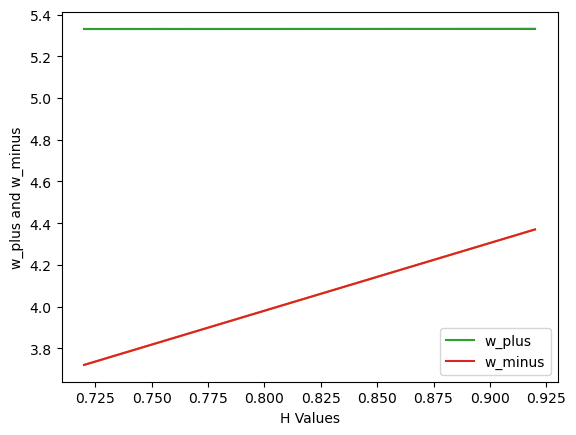

In [10]:
import sympy as sp
import numpy as np

J, gamma = sp.symbols('J, gamma') # d=J+j*gamma
# Define given values
J_value = 0.03
gamma_value = 0.0


# Define the equations
w_plus = ((wa + wb) - j * (a1 + b1 + v + k) + sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2
w_minus = ((wa + wb) - j * (a1 + b1 + v + k) - sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2

# Substitute known values into the equations
w_plus_sub = w_plus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, k: k_value, J: J_value, gamma: gamma_value})
w_minus_sub = w_minus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, k: k_value, J: J_value, gamma: gamma_value})

# Create a lambdified function for w_plus
w_plus_func = sp.lambdify(wb, sp.re(w_plus_sub), modules='numpy')
w_minus_func = sp.lambdify(wb, sp.re(w_minus_sub), modules='numpy')


# Define H values
H_values = np.linspace(0.720, 0.920, 101)
w_plus_results = []
w_minus_results = []

# Loop through H values and calculate w_plus2
for H in H_values:
    wb_value = 1.38284384 + (3.24789744) * H
    
    w_plus2 = w_plus_func(wb_value)
    w_minus2 = w_minus_func(wb_value)
    
    w_plus_results.append(w_plus2)
    w_minus_results.append(w_minus2)

    
plt.plot(H_values,w_plus_results);plt.plot(H_values,w_minus_results)   

# Plot the results
plt.plot(H_values, w_plus_results, label='w_plus')
plt.plot(H_values, w_minus_results, label='w_minus')
plt.xlabel('H Values')
plt.ylabel('w_plus and w_minus')
plt.legend()
plt.show()



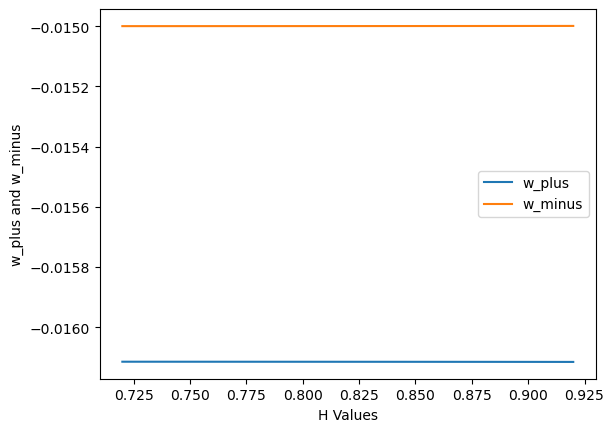

In [11]:


J, gamma = sp.symbols('J, gamma') # d=J+j*gamma
J_value = 0.0
gamma_value = 0.03


# Define the equations
w_plus = ((wa + wb) - j * (a1 + b1 + v + k) + sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2
w_minus = ((wa + wb) - j * (a1 + b1 + v + k) - sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2

# Substitute known values into the equations
w_plus_func = sp.lambdify(wb, sp.im(w_plus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, k: k_value, J: J_value, gamma: gamma_value})), modules='numpy')
w_minus_func = sp.lambdify(wb, sp.im(w_minus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, k: k_value, J: J_value, gamma: gamma_value})), modules='numpy')

# Define H values
H_values = np.linspace(0.720, 0.920, 101)

# Calculate w_plus and w_minus for each H value
w_plus_results = [w_plus_func(1.38284384 + (3.24789744) * H) for H in H_values]
w_minus_results = [w_minus_func(1.38284384 + (3.24789744) * H) for H in H_values]

# Plot the results
plt.plot(H_values, w_plus_results, label='w_plus')
plt.plot(H_values, w_minus_results, label='w_minus')
plt.xlabel('H Values')
plt.ylabel('w_plus and w_minus')
plt.legend()
plt.show()
